# Tutorial 1
## Linear Algebra In Python

In [15]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 2], [3, 4]])
A_T = A.T  # or np.transpose(A)

print("Original matrix A:\n", A)


Original matrix A:
 [[1 2]
 [3 4]]


In [16]:
A_T = A.T  # or np.transpose(A)
print("Transpose A^T:\n", A_T)

Transpose A^T:
 [[1 3]
 [2 4]]


In [17]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

dot_matrix = np.dot(A, B)   # or A @ B
print("Matrix product A · B:\n", dot_matrix)

Matrix product A · B:
 [[19 22]
 [43 50]]


In [18]:
A = np.array([[1, 2], [3, 4]])

det = np.linalg.det(A)
print("Determinant of A:", det)

Determinant of A: -2.0000000000000004


In [19]:
# Compute the inverse
A_inv = np.linalg.inv(A)
print("Inverse of A:\n", A_inv)

Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]


## 2D Rotation

In [20]:
# -------- Helper Function: 2D Rotation Matrix --------
def rot_mat(theta):
    """
    Returns a 2x2 2D rotation matrix for a given angle theta in radians.
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

# -------- Helper Function: Transform a Point Between Frames --------
def transform_point(A_R_B, A_P):
    """
    Transforms a 2D point A_P from frame A to frame B by applying
    the inverse of rotation matrix A_R_B (i.e., rotating in the opposite direction).
    """
    return np.dot(np.linalg.inv(A_R_B), A_P)
  

In [21]:
# ---------- PART A ----------
print("=== Part A ===")
# Frame B is rotated +45° (π/4 radians) relative to frame A
theta_A_to_B = np.pi / 4
A_R_B = rot_mat(theta_A_to_B)          # Rotation from B to A
A_P = np.array([0, 3])                 # Point in frame A
B_P = transform_point(A_R_B, A_P)      # Convert point to frame B
print("Point P in frame B:", B_P)

=== Part A ===
Point P in frame B: [2.12132034 2.12132034]


In [22]:
# ---------- PART B ----------
print("\n=== Part B ===")
# Frame Q is rotated +90° (π/2 radians) relative to frame R
theta_R_to_Q = np.pi / 2
R_R_Q = rot_mat(theta_R_to_Q)          # Rotation from Q to R
R_S = np.array([2, 3])                 # Point in frame R
Q_S = transform_point(R_R_Q, R_S)      # Convert point to frame Q
print("Point S in frame Q:", Q_S)


=== Part B ===
Point S in frame Q: [ 3. -2.]


In [23]:
# ---------- PART C ----------
print("\n=== Part C ===")
# Frame M is rotated +180° (π radians) relative to frame N
theta_N_to_M = np.pi
N_R_M = rot_mat(theta_N_to_M)          # Rotation from M to N
M_X = np.array([5, 1])                 # Point in frame M
N_X = transform_point(N_R_M, M_X)      # Convert point to frame N
print("Point X in frame N:", N_X)


=== Part C ===
Point X in frame N: [-5. -1.]


## 2D Pose

=== Problem A ===
Point P in frame A: [0.29289322 5.53553391]


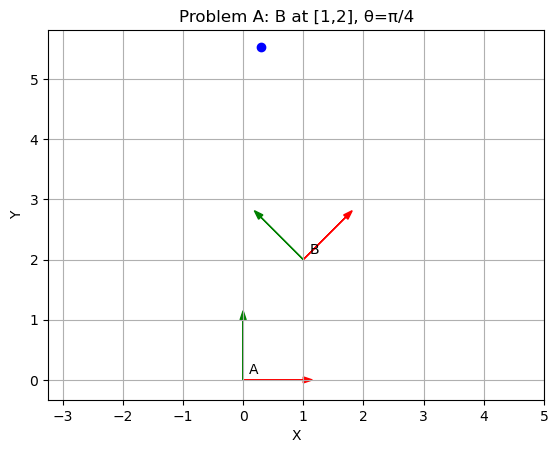


=== Problem B ===
Point P in frame A: [-3.  2.]


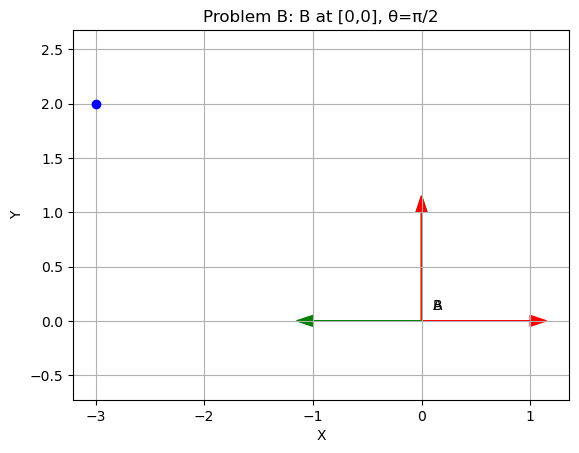


=== Problem C ===
Point P in frame A: [0. 0.]


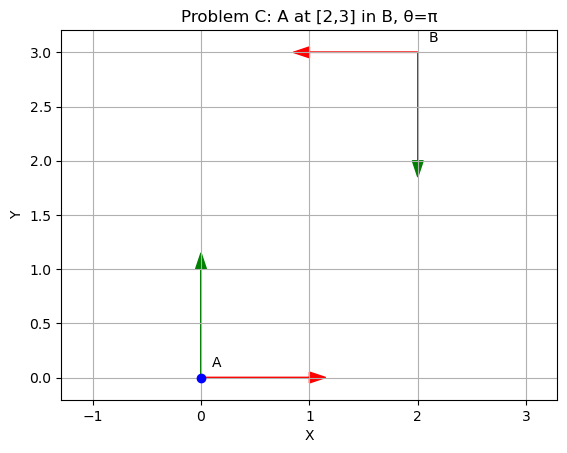


=== Problem D ===
Point P in frame A: [-1.  3.]


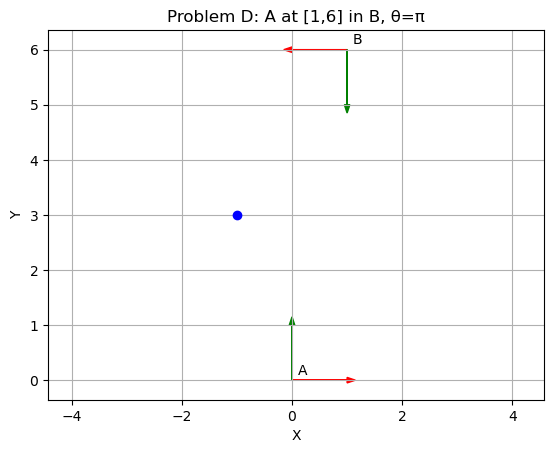

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Helper: Build SE(2) Transform Matrix --------
def make_transform(theta, translation):
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    R = np.array([[cos_t, -sin_t],
                  [sin_t,  cos_t]])
    T = np.eye(3)
    T[0:2, 0:2] = R
    T[0:2, 2] = translation
    return T

# -------- Helper: Apply SE(2) Transformation --------
def transform_point_SE2(T, point):
    point_h = np.array([point[0], point[1], 1])
    return np.dot(T, point_h)[0:2]

# -------- Helper: Plot Coordinate Frame --------
def plot_frame(T, name='Frame', length=1.0):
    origin = T[0:2, 2]
    x_axis = T[0:2, 0] * length
    y_axis = T[0:2, 1] * length
    plt.arrow(origin[0], origin[1], x_axis[0], x_axis[1], color='r', head_width=0.1)
    plt.arrow(origin[0], origin[1], y_axis[0], y_axis[1], color='g', head_width=0.1)
    plt.text(origin[0] + 0.1, origin[1] + 0.1, f'{name}', fontsize=10, color='k')

# Given point in frame B
P_B = np.array([2, 3])

# ---------- Problem A ----------
print("=== Problem A ===")
T_AB = make_transform(theta=np.pi/4, translation=[1, 2])
P_A = transform_point_SE2(T_AB, P_B)
print("Point P in frame A:", P_A)

plt.figure()
plot_frame(np.eye(3), name='A')       # Frame A
plot_frame(T_AB, name='B')            # Frame B
plt.plot(P_A[0], P_A[1], 'bo')
plt.title('Problem A: B at [1,2], θ=π/4')
plt.axis('equal')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# ---------- Problem B ----------
print("\n=== Problem B ===")
T_AB = make_transform(theta=np.pi/2, translation=[0, 0])
P_A = transform_point_SE2(T_AB, P_B)
print("Point P in frame A:", P_A)

plt.figure()
plot_frame(np.eye(3), name='A')
plot_frame(T_AB, name='B')
plt.plot(P_A[0], P_A[1], 'bo')
plt.title('Problem B: B at [0,0], θ=π/2')
plt.axis('equal')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# ---------- Problem C ----------
print("\n=== Problem C ===")
T_BA = make_transform(theta=np.pi, translation=[2, 3])
T_AB = np.linalg.inv(T_BA)
P_A = transform_point_SE2(T_AB, P_B)
print("Point P in frame A:", P_A)

plt.figure()
plot_frame(np.eye(3), name='A')
plot_frame(T_AB, name='B')
plt.plot(P_A[0], P_A[1], 'bo')

plt.title('Problem C: A at [2,3] in B, θ=π')
plt.axis('equal')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# ---------- Problem D ----------
print("\n=== Problem D ===")
T_BA = make_transform(theta=np.pi, translation=[1, 6])
T_AB = np.linalg.inv(T_BA)
P_A = transform_point_SE2(T_AB, P_B)
print("Point P in frame A:", P_A)

plt.figure()
plot_frame(np.eye(3), name='A')
plot_frame(T_AB, name='B')
plt.plot(P_A[0], P_A[1], 'bo')
plt.title('Problem D: A at [1,6] in B, θ=π')
plt.axis('equal')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
